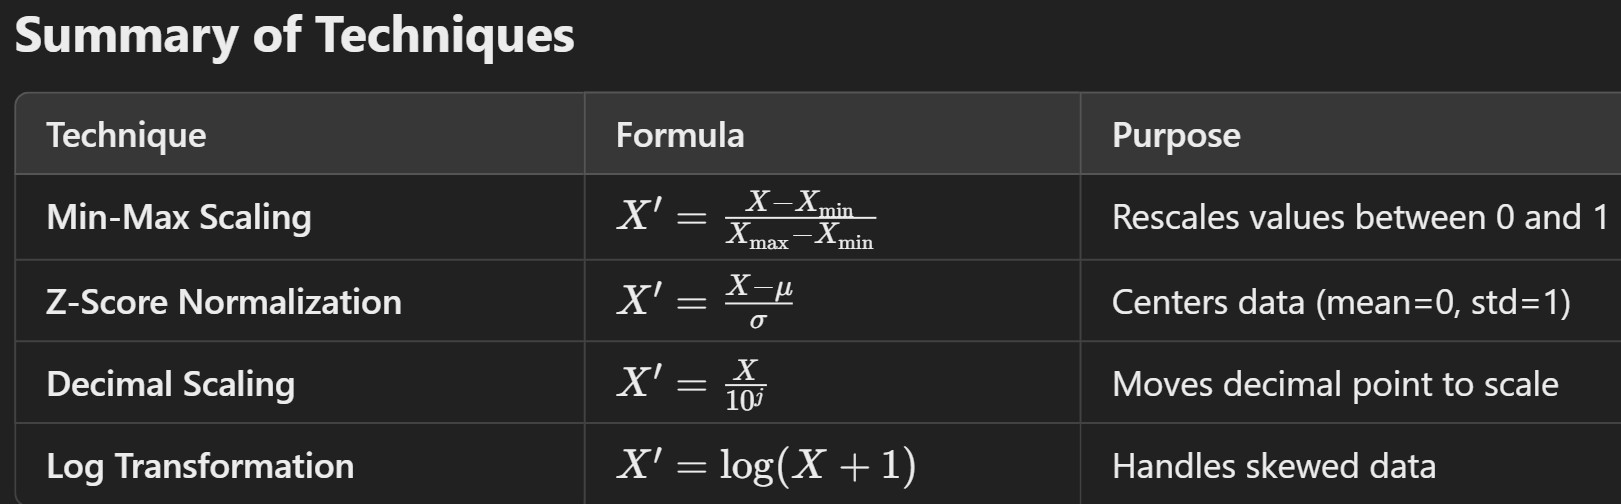

# Step 1: Load the Dataset


In [6]:
import pandas as pd

# Load the Iris dataset
df = pd.read_csv("iris.csv")

# Display the first 5 rows
print(df.head())


   ID  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0   1           5.1          3.5           1.4          0.2  setosa
1   2           4.9          3.0           1.4          0.2  setosa
2   3           4.7          3.2           1.3          0.2  setosa
3   4           4.6          3.1           1.5          0.2  setosa
4   5           5.0          3.6           1.4          0.2  setosa


# Step 2: Extract Features


In [7]:
# Extract feature columns (excluding the class label)
X = df.iloc[:, :-1]  # Selecting all columns except the last one


In [8]:
X

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


# Step 3: Apply Min-Max Normalization


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply transformation
X_minmax = min_max_scaler.fit_transform(X)

# Convert to DataFrame
df_minmax = pd.DataFrame(X_minmax, columns=X.columns)

# Display normalized data
print("Min-Max Normalized Data:\n", df_minmax.head())


Min-Max Normalized Data:
          ID  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0  0.000000      0.222222     0.625000      0.067797     0.041667
1  0.006711      0.166667     0.416667      0.067797     0.041667
2  0.013423      0.111111     0.500000      0.050847     0.041667
3  0.020134      0.083333     0.458333      0.084746     0.041667
4  0.026846      0.194444     0.666667      0.067797     0.041667


# Step 4: Apply Z-Score Normalization (Standardization)


In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
zscore_scaler = StandardScaler()

# Apply transformation
X_zscore = zscore_scaler.fit_transform(X)

# Convert to DataFrame
df_zscore = pd.DataFrame(X_zscore, columns=X.columns)

# Display normalized data
print("Z-Score Normalized Data:\n", df_zscore.head())


Z-Score Normalized Data:
          ID  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0 -1.720542     -0.900681     1.019004     -1.340227    -1.315444
1 -1.697448     -1.143017    -0.131979     -1.340227    -1.315444
2 -1.674353     -1.385353     0.328414     -1.397064    -1.315444
3 -1.651258     -1.506521     0.098217     -1.283389    -1.315444
4 -1.628164     -1.021849     1.249201     -1.340227    -1.315444


# Step 5: Apply Decimal Scaling Normalization


In [5]:
import numpy as np

# Function for Decimal Scaling
def decimal_scaling(data):
    j = np.ceil(np.log10(data.abs().max())).astype(int)  # Find the max exponent
    return data / (10**j)

# Apply decimal scaling
df_decimal_scaled = X.apply(decimal_scaling)

# Display normalized data
print("Decimal Scaled Data:\n", df_decimal_scaled.head())


Decimal Scaled Data:
       ID  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0  0.001          0.51         0.35          0.14         0.02
1  0.002          0.49         0.30          0.14         0.02
2  0.003          0.47         0.32          0.13         0.02
3  0.004          0.46         0.31          0.15         0.02
4  0.005          0.50         0.36          0.14         0.02


# Step 6: Apply Log Transformation


In [6]:
# Apply log transformation
df_log_transformed = np.log1p(X)  # log1p ensures we don't take log(0)

# Display transformed data
print("Log Transformed Data:\n", df_log_transformed.head())


Log Transformed Data:
          ID  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0  0.693147      1.808289     1.504077      0.875469     0.182322
1  1.098612      1.774952     1.386294      0.875469     0.182322
2  1.386294      1.740466     1.435085      0.832909     0.182322
3  1.609438      1.722767     1.410987      0.916291     0.182322
4  1.791759      1.791759     1.526056      0.875469     0.182322


# Step 7: Save Normalized Datasets


In [7]:
df_minmax.to_csv("iris_minmax.csv", index=False)
df_zscore.to_csv("iris_zscore.csv", index=False)
df_decimal_scaled.to_csv("iris_decimal_scaled.csv", index=False)
df_log_transformed.to_csv("iris_log_transformed.csv", index=False)
